In [10]:
# Esta versión es un 20 % más lenta que la versión sin bucle en verificar()

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, hypergeom, binom

In [12]:
# Función para comprobar si el lote es aceptable
# Criterio de aceptación: c o menos, lote aceptable
# Output: 1 si el lote es aceptable, 0 no lo es

def verificar(c, lote, muestra):
    d = 0
    for i in muestra:
        if lote[i] == 1:
            d += 1
    if d > c:
        return 0
    else:
        return 1

# Función de toma de muestra. Input tamaño de la muestra,
# la salida es una matriz con las
# unidades muestradas (1=unidad muestreada)

def toma_muestra(n):
    muestra = np.random.random_integers(0,N,n)
    return muestra

# Función que crea un lote con 'defect' defectos

def crea_lote(defect):
    lote = np.zeros(N, dtype=int)
    lote[:defect] = 1
    np.random.shuffle(lote)
    return lote

In [13]:
N = 2500      # Tamaño del lote
defect = 188  # Unidades defectuosas del lote (tanto por uno)
n = 88        # Tamaño de la muestra
c = 3         # Criterio de aceptación

In [14]:
# %%timeit
intentos = 300
muestra = toma_muestra(n)
suma_aceptable = np.zeros(N)
for i in range(N):
    for j in range(intentos):
        lote = crea_lote(i)
        # muestra = toma_muestra(n)
        suma_aceptable[i] += verificar(c, lote, muestra)

/Users/javier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 2500 + 1) instead


1min 41s ± 834 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


NameError: name 'suma_aceptable' is not defined

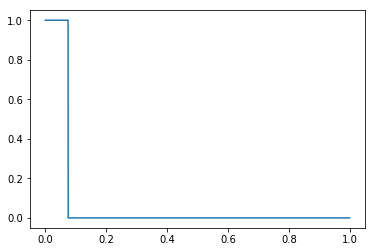

In [15]:
p_max = 1  # Valor máximo de p a representar
n_max=int(p_max*N)  # Número máximo de elementos a representar
p = np.linspace(0,p_max, n_max, endpoint=False)
plt.plot(p,p<defect/N, label="100% inspección")
plt.plot(p,suma_aceptable[:n_max]/intentos, label="Simulación")
plt.plot(p, poisson.cdf(c,p*n), label="Poisson")
plt.plot(p, 1-hypergeom.cdf(p*n,N,defect,n), label="Hipergeométrica")
plt.plot(p, 1-binom.cdf(p*n, n, defect/N), label="Binomial")
plt.xlabel("p")
plt.ylabel("Pa")
plt.legend()

In [7]:
suma_a

47
19
36
50
10
26
41
13
13
1


/Users/javier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 50 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until
